In [45]:
import pandas as pd
import matplotlib.pyplot as plt

import os

In [46]:
glue_evaluation_results = pd.read_csv(os.path.join("evaluation_results", "ajtorek", "all_glue_results.csv"))

In [48]:
model_names = {}
for row in glue_evaluation_results.iterrows():
    old_model_name = row[1][0]
    new_model_name = old_model_name[8:29]
    if old_model_name == "electra-num_experts-1-top_k-1-capacity_factor-1.0":
        new_model_name = "Base Model"
    
    model_names[old_model_name] = new_model_name

/tmp/ipykernel_10875/1628631063.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old_model_name = row[1][0]


In [49]:
glue_evaluation_results["Unnamed: 0"] = glue_evaluation_results["Unnamed: 0"].map(model_names)

In [50]:
glue_evaluation_results.set_index(glue_evaluation_results["Unnamed: 0"], inplace=True)

In [51]:
glue_evaluation_results = glue_evaluation_results.drop(columns=["Unnamed: 0"])

In [52]:
glue_evaluation_results["glue"] = glue_evaluation_results.mean(axis=1)

In [55]:
glue_evaluation_results.sort_index(inplace=True)

<Axes: title={'center': 'GLUE Scores for Mixture of Expert Models'}, xlabel='Models', ylabel='GLUE Score'>

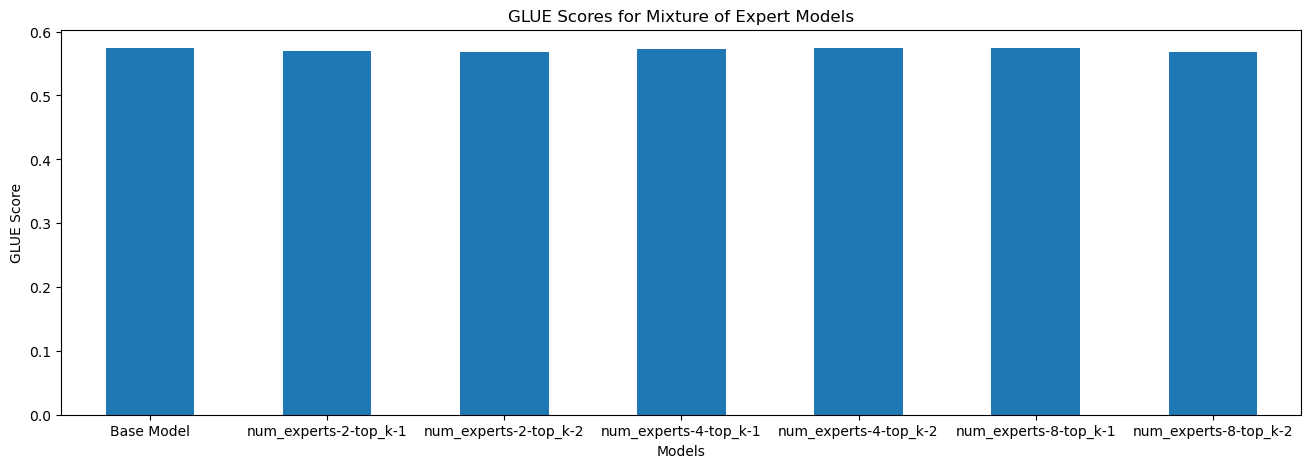

In [61]:
glue_evaluation_results["glue"].plot.bar(rot=0, figsize=(16,5), xlabel="Models", ylabel="GLUE Score", title="GLUE Scores for Mixture of Expert Models")

In [62]:
glue_evaluation_results.to_latex()

'\\begin{tabular}{lrrrrrrrrr}\n\\toprule\n & cola & mnli & mrpc & qnli & qqp & rte & sst2 & wnli & glue \\\\\nUnnamed: 0 &  &  &  &  &  &  &  &  &  \\\\\n\\midrule\nBase Model & 0.000000 & 0.637307 & 0.691176 & 0.621270 & 0.797502 & 0.501805 & 0.794725 & 0.549296 & 0.574135 \\\\\nnum_experts-2-top_k-1 & 0.000000 & 0.640155 & 0.688725 & 0.605711 & 0.793396 & 0.472924 & 0.793578 & 0.563380 & 0.569734 \\\\\nnum_experts-2-top_k-2 & 0.000000 & 0.627543 & 0.678922 & 0.600220 & 0.798343 & 0.472924 & 0.797018 & 0.563380 & 0.567294 \\\\\nnum_experts-4-top_k-1 & 0.037162 & 0.615643 & 0.681373 & 0.598206 & 0.787039 & 0.494585 & 0.788991 & 0.577465 & 0.572558 \\\\\nnum_experts-4-top_k-2 & 0.043259 & 0.629170 & 0.686275 & 0.598206 & 0.798219 & 0.472924 & 0.790138 & 0.577465 & 0.574457 \\\\\nnum_experts-8-top_k-1 & 0.000000 & 0.610761 & 0.683824 & 0.609189 & 0.780707 & 0.519856 & 0.795872 & 0.591549 & 0.573970 \\\\\nnum_experts-8-top_k-2 & -0.007887 & 0.627238 & 0.688725 & 0.599854 & 0.796785 & 0.48